# Customer satisfaction prediction

## Dataset structure
| n    | Variable                      | Description                                                  |
| :--- | :---------------------------- | :----------------------------------------------------------- |
| 1    | id                            | Client ID                                                    |
| 2    | Gender                        | Client Gender                                                |
| 3    | Customer type                 | Client type: Premium or Standard                             |
| 4    | Age                           | Client Age                                                   |
| 5    | Price                         | Client Age                                                   |
| 6    | New/Used                      | Client Age                                                   |
| 7    | Category                      | Client Age                                                   |
| 8    | Product description accuracy  | Level of satisfaction on product description                 |
| 9    | Manufacturer stainability     | Level of satisfaction on the manufacturing sustainability process |
| 10   | Packaging quality             | Level of satisfaction on packaging                           |
| 11   | Additional options            | Level of satisfaction on extra options                       |
| 12   | Reviews and ratings           | Level of satisfaction on reviews and rating information      |
| 13   | Integrity of packaging        | Level of satisfaction on packaging state                     |
| 14   | Check-out procedure           | Level of satisfaction on payment procedure                   |
| 15   | Relevance of related products | Level of satisfaction on related product suggestion          |
| 16   | Costumer insurance            | Level of satisfaction on insurance options                   |
| 17   | Shipping delay in days        | Delay of shipping in days                                    |
| 18   | Arrival delay in days         | Arrival delay on days                                        |
| 19   | Satisfaction                  | Target: Satisfied, Not Satisfied                             |

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [88]:
df = pd.read_csv('../data/interim/model_cleaned.csv', index_col=0)
df.head()

,id,Gender,Customer Type,Age,Price,NewUsed,Category,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,Satisfaction
0,139Q880b,Female,Premium,60.0,37.66,New,Entertainment,4,4,2,4,3,5,3,4,2,0,0,0
1,513F768p,Female,Premium,57.0,331.90,New,Technology,1,1,3,5,5,5,4,5,5,0,0,1
2,933T167j,Female,Premium,38.0,311.06,New,Technology,3,3,5,5,5,4,1,5,5,0,0,1
3,193N829g,Male,Premium,44.0,85.14,New,Technology,5,5,3,2,5,4,5,1,3,0,0,0
4,661I898j,Male,Premium,37.0,23.15,New,Entertainment,1,1,5,1,3,3,2,2,5,0,0,1


In [89]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Price', 'NewUsed', 'Category',
       'Product description accuracy', 'Manufacturer sustainability',
       'Packaging quality', 'Additional options',
       'Helpfulness of reviews and ratings', 'Integrity of packaging',
       'Ease check-out procedure', 'Relevance of related products',
       'Costumer insurance', 'Shipping delay in days', 'Arrival delay in days',
       'Satisfaction'],
      dtype='object')

In [103]:
selection = ['Product description accuracy', 'Manufacturer sustainability',
       'Packaging quality', 'Additional options',
       'Helpfulness of reviews and ratings', 'Integrity of packaging',
       'Ease check-out procedure', 'Relevance of related products',
       'Costumer insurance', 'Satisfaction']
df_selected = df[selection]

In [104]:
df_selected.head()

,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Satisfaction
0,4,4,2,4,3,5,3,4,2,0
1,1,1,3,5,5,5,4,5,5,1
2,3,3,5,5,5,4,1,5,5,1
3,5,5,3,2,5,4,5,1,3,0
4,1,1,5,1,3,3,2,2,5,1


In [105]:
df_selected.to_csv('../data/interim/model_pca.csv')

***
## Principal components analysis

In [106]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

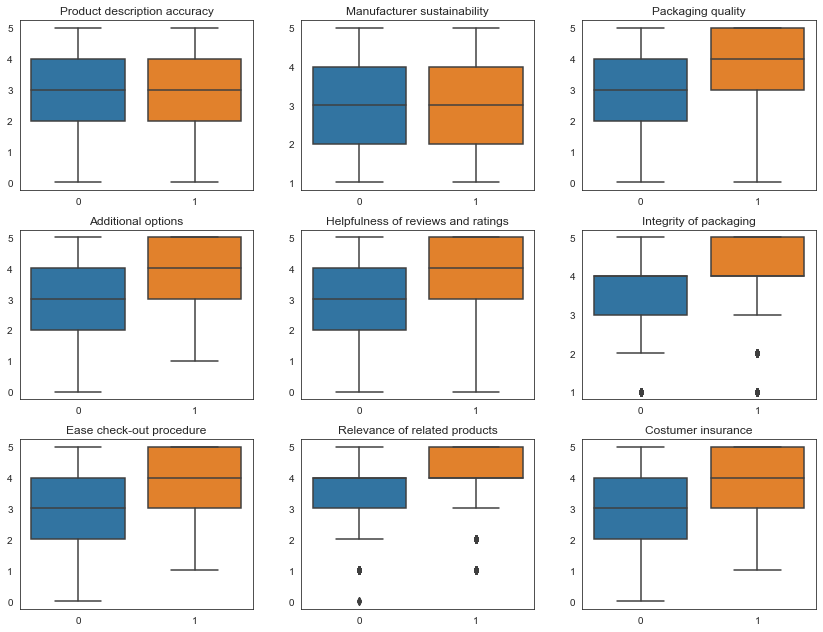

In [107]:
#selection.remove('Satisfaction')

fig, axes= plt.subplots(ncols=3, nrows=3, figsize = (12,9))
plt.tight_layout(pad = 2)

for col, ax in zip(selection, axes.flat):
    box = sns.boxplot(x ='Satisfaction', y = col, data = df_selected, ax = ax)
    box.set_xlabel('')
    box.set_ylabel('')
    box.set_title(col)
plt.savefig('../reports/figures/boxplot_review.png', dpi = 200)
plt.show()

In [108]:
selection.remove('Satisfaction')
scaler = StandardScaler()
scaler.fit(df_selected[selection])
df_scaled = pd.DataFrame(scaler.transform(df_selected[selection]))
df_scaled.columns = df_selected[selection].columns
df_scaled

,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance
0,0.614787,0.800233,-0.893004,0.491497,-0.254818,1.167069,-0.237282,0.312945,-0.966122
1,-1.349641,-1.548603,-0.142870,1.267095,1.264399,1.167069,0.552238,1.163755,1.314009
2,-0.040022,0.017287,1.357397,1.267095,1.264399,0.320533,-1.816323,1.163755,1.314009
3,1.269597,1.583178,-0.142870,-1.059700,1.264399,0.320533,1.341758,-2.239485,-0.206078
4,-1.349641,-1.548603,1.357397,-1.835298,-0.254818,-0.526004,-1.026803,-1.388675,1.314009
...,...,...,...,...,...,...,...,...,...
49995,-1.349641,0.017287,-1.643137,-1.835298,-1.774035,-2.219077,-1.026803,-0.537865,-0.966122
49996,-0.040022,0.800233,-0.142870,-1.835298,-1.014427,0.320533,-1.026803,0.312945,-0.206078
49997,-0.040022,0.017287,1.357397,0.491497,-0.254818,-0.526004,-1.026803,-0.537865,1.314009
49998,-0.040022,0.800233,0.607263,-0.284102,-1.014427,0.320533,-0.237282,0.312945,0.553965


In [109]:
pca = PCA()
pca.fit(df_scaled)

PCA()

In [110]:
df_pca = pd.DataFrame(pca.transform(df_scaled))

In [111]:
explained_var=pd.DataFrame(pca.explained_variance_ratio_).transpose()
explained_var.columns = ['PC1','PC2','PC3','PC4','PC5','PC6', 'PC7', 'PC8', 'PC9']
explained_var

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.291221,0.180197,0.159119,0.096648,0.079966,0.060452,0.054856,0.041299,0.036241


In [112]:
cum_explained_var=np.cumsum(pca.explained_variance_ratio_)
cum_explained_var = pd.DataFrame(cum_explained_var)
cum_explained_var.columns = ['CUMSUM']
cum_explained_var

,CUMSUM
0,0.291221
1,0.471418
2,0.630537
3,0.727185
4,0.807151
5,0.867604
6,0.922460
7,0.963759
8,1.000000


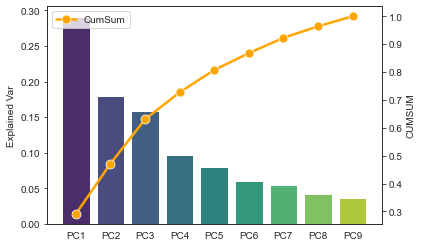

In [124]:
sns.set_style('white')
ax = sns.barplot(data=explained_var, palette = 'viridis')
ax.set_ylabel('Explained Var')
ax2 = plt.twinx()
sns.lineplot(x = cum_explained_var.index, y = 'CUMSUM', data = cum_explained_var, ax = ax2, color = 'orange', marker = 'o', markersize = 9, linewidth = 2.5, label = 'CumSum');
plt.legend()

In [54]:
pd.DataFrame(pca.components_,index=['PC1','PC2','PC3','PC4','PC5','PC6', 'PC7', 'PC8', 'PC9'],columns=df_scaled.columns)

,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance
PC1,-0.086890,-0.005359,-0.154560,-0.472040,-0.365620,-0.488288,-0.291248,-0.492826,-0.214254
PC2,0.091917,0.081994,-0.679239,0.121492,0.106391,0.166304,-0.083794,0.171542,-0.658239
PC3,-0.694499,-0.703041,-0.068188,0.058379,0.082561,0.037444,-0.030818,0.043802,-0.065274
PC4,-0.112779,0.180373,0.161045,0.047938,0.302147,0.103478,-0.900318,0.098750,0.064710
PC5,0.028852,-0.075944,0.062375,0.227643,-0.862505,0.251750,-0.225210,0.282265,-0.001352
PC6,-0.677813,0.650539,-0.022783,-0.184538,-0.102385,0.147368,0.196034,0.110294,0.000305
PC7,-0.169206,0.193471,-0.034864,0.809987,-0.031907,-0.452185,0.004663,-0.266684,-0.003545
PC8,-0.005568,0.002766,-0.061901,0.116845,-0.022004,0.655390,-0.012948,-0.741082,0.055554
PC9,0.005336,-0.006317,-0.688987,-0.033227,-0.031519,-0.052015,-0.085392,0.062171,0.713630


>There is no semantic meaning for new components.

In [125]:
df_pca.columns=['PC1','PC2','PC3','PC4','PC5','PC6', 'PC7', 'PC8', 'PC9']
df_pca = pd.concat([df_pca, df_selected['Satisfaction']], axis = 1)
df_pca.to_csv('../data/processed/mdoel_PCA_final.csv')

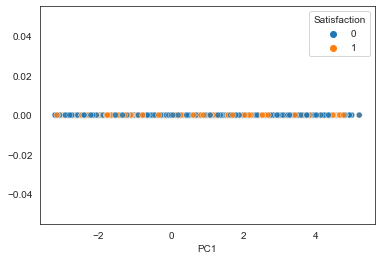

In [126]:
sns.scatterplot(x = 'PC1', y=[0]*(df_pca['Satisfaction'].size), data=df_pca, hue = 'Satisfaction', alpha = .8);

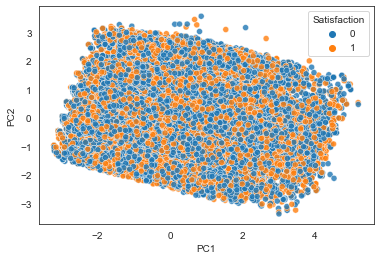

In [135]:
sns.scatterplot(x = 'PC1', y = 'PC2', data=df_pca, hue = 'Satisfaction', alpha = .8);

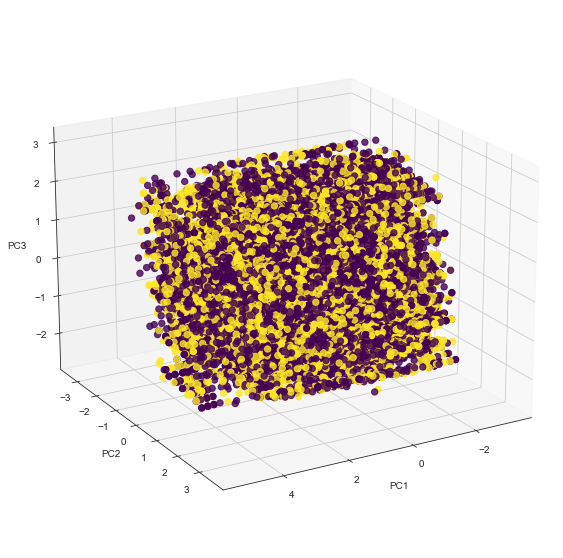

In [129]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'],df_pca['PC3'], c=df_pca['Satisfaction'], cmap = 'viridis', s=40, alpha = .8)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.view_init(20, 60)
plt.show()